In [8]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [10]:
import tensorflow as tf

import sys
import subprocess

try:
    import tensorflow as tf
except ImportError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "tensorflow==2.16.1"])
    import tensorflow as tf

print(f"TensorFlow version: {tf.__version__}")

# IMPORTANT: Check eager execution status
eager_status = tf.executing_eagerly()
print(f"Eager execution enabled: {eager_status}")

if not eager_status:
    print("\n⚠️  WARNING: Eager execution is disabled!")
    print("Please RESTART THE KERNEL (Kernel → Restart Kernel) and run all cells again.")
    print("This is required for TensorFlow 2.x to work properly with data generators.\n")
    # Try to enable it (may not work if kernel was started with it disabled)
    try:
        tf.config.run_functions_eagerly(True)
        print("Attempted to enable eager execution...")
    except:
        print("Could not enable eager execution. Kernel restart required.")

# Configure GPU memory growth for TensorFlow 2.x
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Enable memory growth to avoid allocating all GPU memory at once
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"Found {len(gpus)} GPU(s) - Memory growth enabled")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU found, using CPU")


TensorFlow version: 2.19.0
Eager execution enabled: True
Found 1 GPU(s) - Memory growth enabled


In [11]:
print(tf.__version__)


2.19.0


In [12]:
import kagglehub
path = kagglehub.dataset_download("ananysharma/diseasecotton" )
print("Dataset downloaded to:", path)


Using Colab cache for faster access to the 'diseasecotton' dataset.
Dataset downloaded to: /kaggle/input/diseasecotton


In [13]:
import os

base_path = "/kaggle/input/diseasecotton/data"

train_path = os.path.join(base_path, "train")
valid_path = os.path.join(base_path, "val")
test_path  = os.path.join(base_path, "test")

# List classes in training set
folders = os.listdir(train_path)
print("Classes found in training set:", folders)

Classes found in training set: ['fresh cotton plant', 'fresh cotton leaf', 'diseased cotton plant', 'diseased cotton leaf']


In [14]:
IMAGE_SIZE = [224, 224]

In [15]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [16]:
for layer in vgg16.layers:
    layer.trainable = False

In [17]:
x = Flatten()(vgg16.output)

In [18]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [19]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │       100,356 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,815,044 (56.51 MB)

 Trainable params: 100,356 (392.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [20]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'],
  run_eagerly=True  # Force eager execution for compatibility
)

In [21]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

# For data augmentation during training
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# For validation/test (no augmentation)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 classes=None)

Found 1951 images belonging to 4 classes.


In [23]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            classes=sorted(training_set.class_indices.keys()),
                                            shuffle=False)

Found 18 images belonging to 4 classes.


In [24]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=training_set.samples // training_set.batch_size,
  validation_steps=test_set.samples // test_set.batch_size,
  verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.5947 - loss: 1.1746 - val_accuracy: 0.8333 - val_loss: 0.2970
Epoch 2/20
 1/60 ━━━━━━━━━━━━━━━━━━━━ 35s 607ms/step - accuracy: 0.8125 - loss: 0.4001

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8125 - loss: 0.4001 - val_accuracy: 0.8889 - val_loss: 0.2285
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 47s 778ms/step - accuracy: 0.9058 - loss: 0.2506 - val_accuracy: 0.8333 - val_loss: 0.3075
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9375 - loss: 0.2273 - val_accuracy: 0.8889 - val_loss: 0.2182
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 47s 771ms/step - accuracy: 0.9399 - loss: 0.1800 - val_accuracy: 0.8889 - val_loss: 0.2677
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9062 - loss: 0.2510 - val_accuracy: 0.8889 - val_loss: 0.1951
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 47s 773ms/step - accuracy: 0.9532 - loss: 0.1569 - val_accuracy: 0.9444 - val_loss: 0.1196
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9688 - loss: 0.1029 - val_accuracy: 0.9444 - val_loss: 0.1405
Epoch 9/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 81s 798ms/step - accuracy: 0.9621 - loss: 0.1122 - val_accuracy: 0.9444 - val_

In [25]:
import matplotlib.pyplot as plt

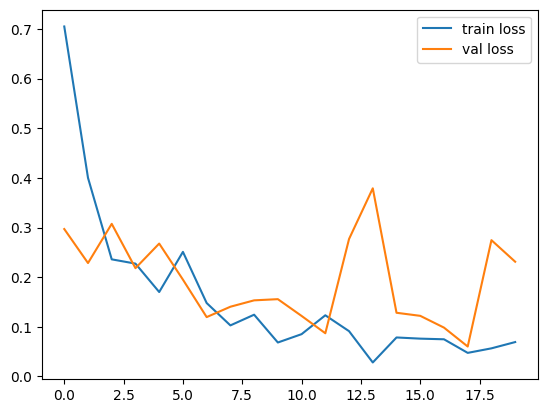

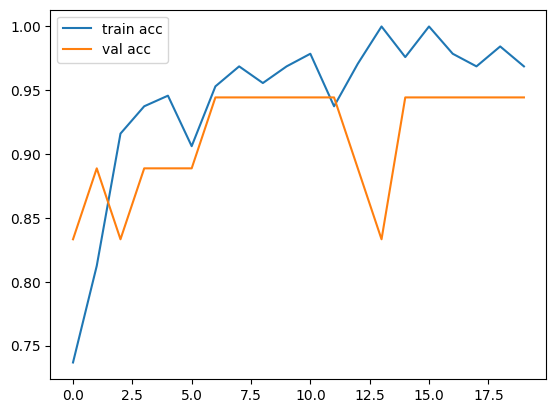

<Figure size 640x480 with 0 Axes>

In [26]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [37]:
y_pred = model.predict(test_set)

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


In [38]:
y_pred

array([[9.99901175e-01, 8.20125661e-06, 8.52339072e-05, 5.36439211e-06],
       [9.99906778e-01, 3.30198532e-06, 8.98391809e-05, 3.90891985e-10],
       [7.10839570e-01, 2.88893074e-01, 1.37769341e-04, 1.29509615e-04],
       [5.84462714e-06, 9.98740017e-01, 1.85238328e-04, 1.06889708e-03],
       [1.80605571e-06, 9.99689162e-01, 3.34157016e-06, 3.05618189e-04],
       [4.55545091e-07, 9.99951601e-01, 5.33173434e-08, 4.79125811e-05],
       [6.05435105e-07, 9.99711454e-01, 3.79752964e-06, 2.84118752e-04],
       [1.45086897e-05, 9.88214374e-01, 4.55343688e-05, 1.17254918e-02],
       [4.07623702e-05, 5.22710764e-07, 9.99957681e-01, 9.80900040e-07],
       [6.02734915e-04, 1.80002698e-05, 9.99348223e-01, 3.10660180e-05],
       [2.26601100e-04, 1.28637145e-08, 9.99773383e-01, 3.30651195e-09],
       [6.52763702e-05, 1.52858061e-04, 9.99777317e-01, 4.45708793e-06],
       [5.00811497e-04, 4.72813781e-07, 9.99498010e-01, 7.02946920e-07],
       [3.43812222e-04, 3.45661491e-01, 7.77381822e

In [39]:
training_set.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [40]:
import numpy as np
y_pred_classes = np.argmax(y_pred, axis=1)

In [41]:
y_pred_classes

array([0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 1, 3, 3, 3])

In [43]:
y_true = test_set.classes
y_true

array([0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3], dtype=int32)

In [46]:
class_labels = list(test_set.class_indices.keys())

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import seaborn as sns

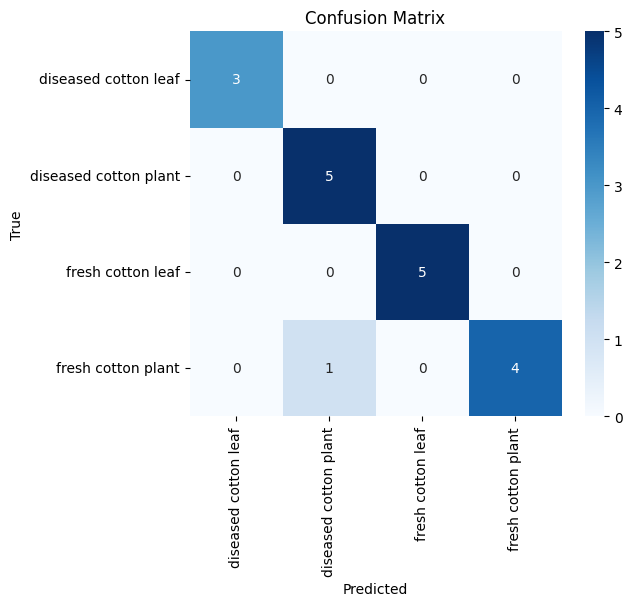

In [48]:
#Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [49]:
# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


📊 Classification Report:
                       precision    recall  f1-score   support

 diseased cotton leaf       1.00      1.00      1.00         3
diseased cotton plant       0.83      1.00      0.91         5
    fresh cotton leaf       1.00      1.00      1.00         5
   fresh cotton plant       1.00      0.80      0.89         5

             accuracy                           0.94        18
            macro avg       0.96      0.95      0.95        18
         weighted avg       0.95      0.94      0.94        18



In [50]:
# metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')

print("✔ Accuracy:", accuracy)
print("✔ Precision:", precision)
print("✔ Recall:", recall)

✔ Accuracy: 0.9444444444444444
✔ Precision: 0.9583333333333334
✔ Recall: 0.95


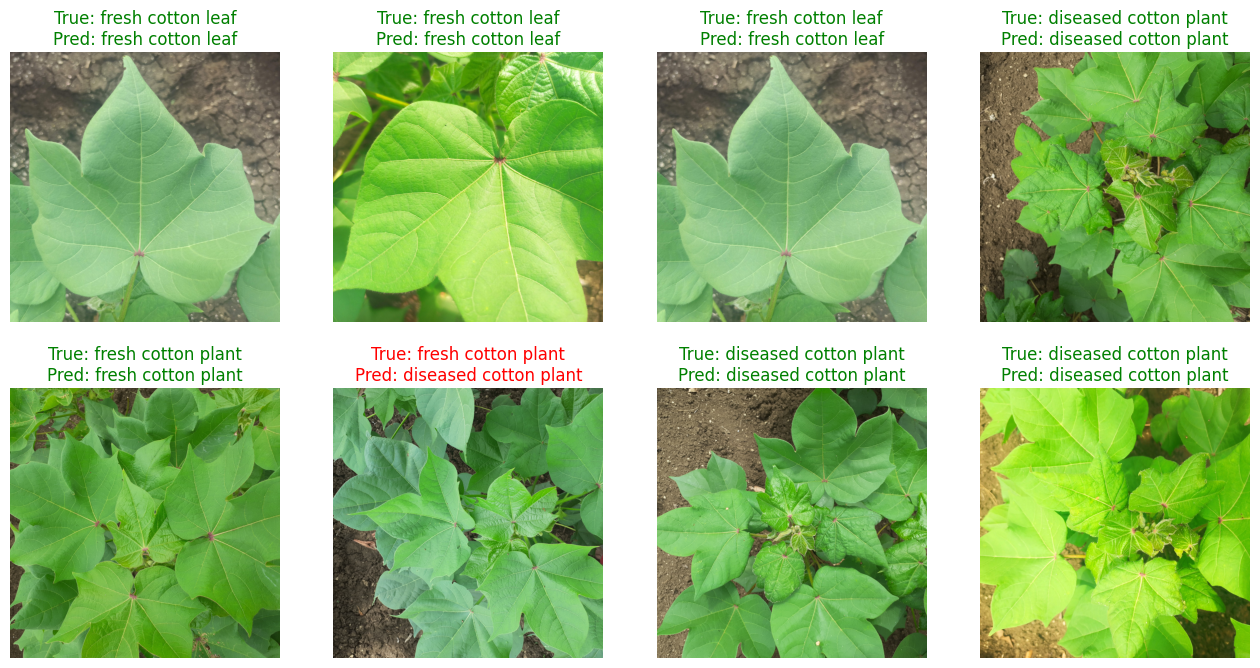

In [52]:
import random

def show_predictions(generator, y_pred_classes, class_labels, num_images=8):
    plt.figure(figsize=(16, 8))
    for i in range(num_images):
        idx = random.randint(0, len(generator.filenames)-1)

        img_path = generator.filepaths[idx]
        img = plt.imread(img_path)

        true_label = class_labels[y_true[idx]]
        pred_label = class_labels[y_pred_classes[idx]]

        plt.subplot(2, 4, i+1)
        plt.imshow(img)
        plt.title(f"True: {true_label}\nPred: {pred_label}",
                  color="green" if true_label == pred_label else "red")
        plt.axis("off")
    plt.show()

show_predictions(test_set, y_pred_classes, class_labels)

### ✅ NEXT
1.   Use a stronger pretrained model (EfficientNetB0/B1, ResNet50,MobileNetV2).
2.   Increase input image size (256×256, 299×299, 380×380).
3. Apply heavier data augmentation
4. Unfreeze more layers and fine-tune with a low learning rate (1e-5).

5. Add Batch Normalization after convolution blocks.

6. Use Dropout (0.3–0.5) in fully connected layers.

7. Use a learning rate scheduler (ReduceLROnPlateau).

8. Train longer (30–50 epochs) with EarlyStopping.

9. Apply class weights if classes are imbalanced.

10. Clean the dataset (remove mislabeled or corrupted images).

11. Use L2 regularization on dense layers.

12. Increase batch size or tune it (8, 16, 32).

13. Use label smoothing (e.g., 0.1).

14. Use Mixup or Cutout augmentation.

15. Use test-time augmentation (TTA).